# Regresssion in Scikit-learn

In [20]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
# Importing dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
df_linear = df[['age', 'fare']]
df_linear.columns

Index(['age', 'fare'], dtype='object')

In [23]:
print(df_linear['age'].isnull().sum() / len(df_linear) * 100)
print(df_linear['fare'].isnull().sum() / len(df_linear) * 100)

19.865319865319865
0.0


In [24]:
df_linear['age'].fillna(df_linear['age'].mean(), inplace=True)
print(df_linear['age'].isnull().sum() / len(df_linear) * 100)

0.0


C:\Users\Kabir\AppData\Local\Temp\ipykernel_10456\616878363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear['age'].fillna(df_linear['age'].mean(), inplace=True)


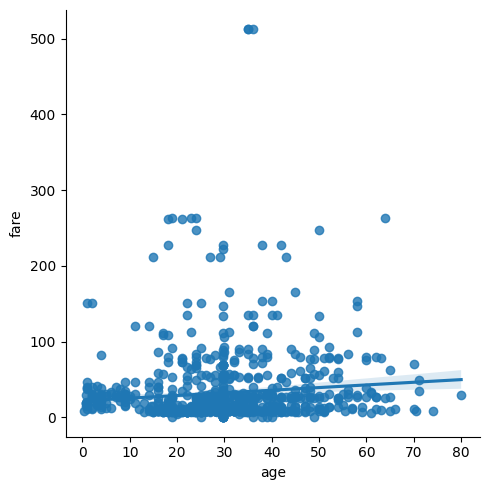

In [25]:
sns.lmplot(data=df_linear, x='age', y='fare')

<Axes: ylabel='age'>

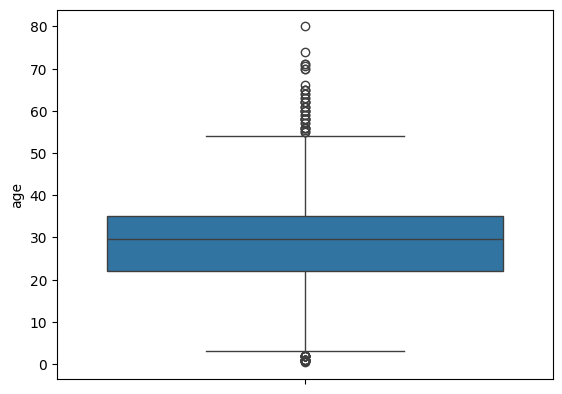

In [26]:
sns.boxplot(data=df_linear, y='age')

In [27]:
df_linear = df_linear[(df_linear['age'] > 8) & (df_linear['age'] < 50)]

<Axes: ylabel='age'>

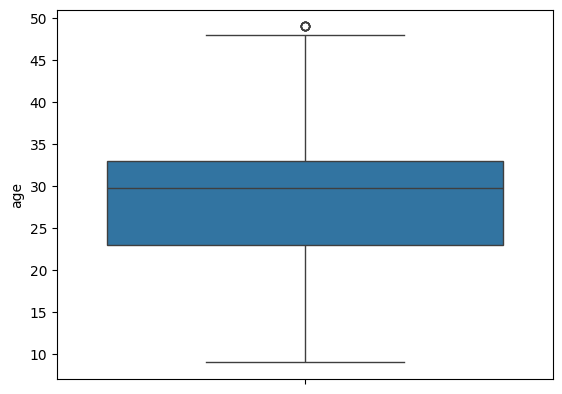

In [28]:
sns.boxplot(data=df_linear, y='age')

<Axes: ylabel='fare'>

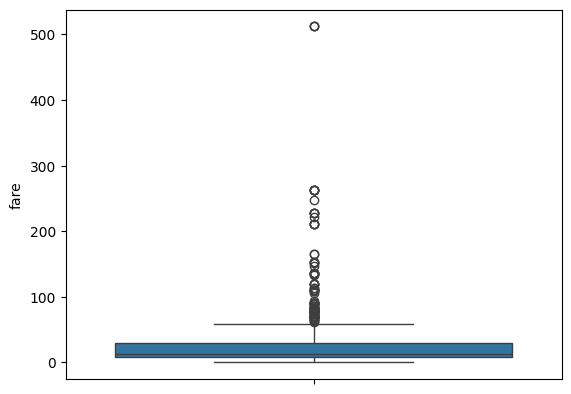

In [29]:
sns.boxplot(data=df_linear, y='fare')

In [30]:
df_linear = df_linear[(df_linear['fare'] > 1) & (df_linear['fare'] < 35)]

<Axes: ylabel='fare'>

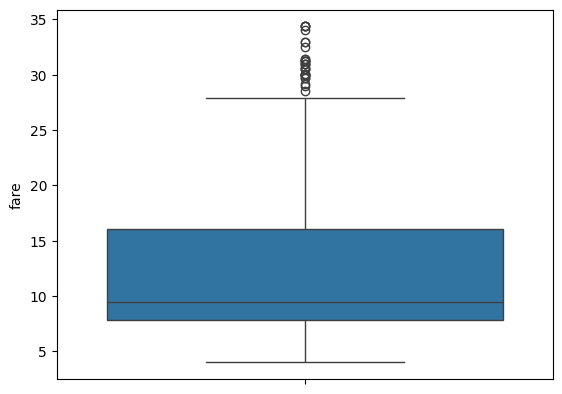

In [31]:
sns.boxplot(data=df_linear, y='fare')

In [32]:
X = df_linear[['age']]
y = df_linear['fare']

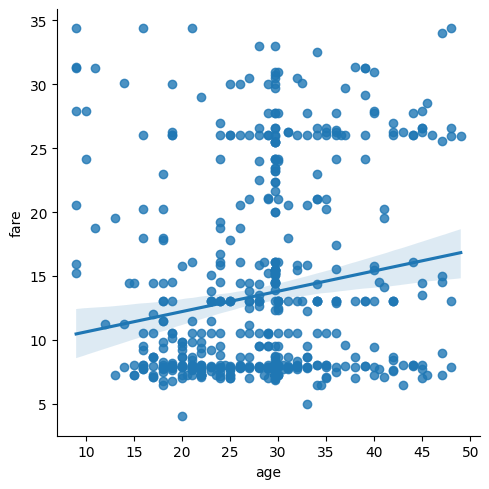

In [33]:
sns.lmplot(data=df_linear, x='age', y='fare')

In [34]:
# Calling model
model = LinearRegression()

# Fitting model
model.fit(X, y)

# Predicting model
model.predict([[55]])


C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.77917613])

In [35]:
# Model evaluation with metrics
# R^2, mean squared error, MAE, RMSE

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [36]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(589, 1)
(471, 1)
(118, 1)


In [37]:
# Calling model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting
predictions = model.predict(X_test)

<Axes: xlabel='fare'>

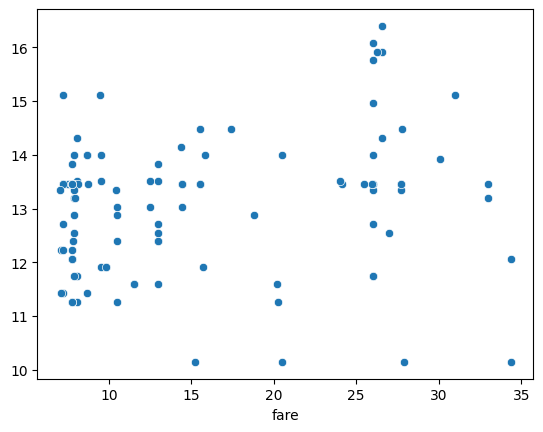

In [19]:
# Comparing
sns.scatterplot(x=y_test, y=predictions)

In [90]:
model.score(X_test, y_test)

0.02044077317118964

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MAE = mean_absolute_error(y_true=y_test, y_pred=predictions)
MSE = mean_squared_error(y_true=y_test, y_pred=predictions)
RMSE = mean_squared_error(y_true=y_test, y_pred=predictions, squared=False)
R2 = r2_score(y_true=y_test, y_pred=predictions)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("R_squared: ", R2)

MAE:  6.142881042580255
MSE:  57.96195356123706
RMSE:  7.613274825016963
R_squared:  0.02044077317118964


In [97]:
RMSE = np.sqrt(MSE)
RMSE

7.613274825016963